# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Revalina Aryanti
- **Email:** revarevalinaaryanti@gmail.com
- **ID Dicoding:** MS153D5X0632

## Menentukan Pertanyaan Bisnis

Berikut pertanyaan bisnis yang saya tentukan untuk analisis Bike Sharing Dataset:

1. Bagaimana perbandingan Penggunaan Sepeda pada Hari Libur dan Tidak Libur?
2. Bagaimana pola penggunaan sepeda pada hari-hari tertentu?
3. Bagaimana pola penggunaan sepeda pada musim-musim tertentu?
4. Waktu (jam) dengan peminjaman tertinggi berdasarkan jam?
5. Bagaimana cara menentukan segmen pengguna berdasarkan jumlah peminjaman sepeda dalam pendekatan Clustering Manual?

## Import Semua Packages/Library yang Digunakan

In [1]:
import streamlit as st 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling

### Gathering Data

In [7]:
day_df = pd.read_csv("https://raw.githubusercontent.com/pawcatReva/dicoding/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [2]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/pawcatReva/dicoding/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data bersumber dari URL, jadi perlu koneksi internet saat dijalankan

### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [3]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Memastikan data siap digunakan sebelum analisis lebih lanjut.

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Mengecek apakah ada data kosong di day_df dan hour_df.
- Jika ada, perlu ditangani sebelum analisis.

In [5]:
print("Jumlah nilai unik per kolom:\n", hour_df.nunique())

Jumlah nilai unik per kolom:
 instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64


In [8]:
print("Jumlah nilai unik per kolom:\n", day_df.nunique())

Jumlah nilai unik per kolom:
 instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64


**Insight:**
- Jika nilai unik sedikit, fitur ini bisa dikategorikan sebagai data kategorikal.
- Jika nilai unik terlalu banyak, ada kemungkinan inkonsistensi data atau bisa digunakan untuk segmentasi.
- Fitur dengan jumlah unik tinggi bisa jadi kandidat untuk identifikasi tren atau outlier.

In [10]:
day_df.duplicated().sum()

np.int64(0)

In [9]:
hour_df.duplicated().sum()

np.int64(0)

**Insight:**
- Jika ada duplikasi, perlu dibersihkan untuk akurasi analisis.

In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Menampilkan ringkasan data numerik seperti mean, min, max, quartile.
- Berguna untuk memahami distribusi dan sebaran data.

In [9]:
print(hour_df[(hour_df['instant'] > 100) | (hour_df['instant'] < -100)])

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
100        101  2011-01-05       1   0     1   9        0        3   
101        102  2011-01-05       1   0     1  10        0        3   
102        103  2011-01-05       1   0     1  11        0        3   
103        104  2011-01-05       1   0     1  12        0        3   
104        105  2011-01-05       1   0     1  13        0        3   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
100             1           1  0.22  0.1970  0.37     0.3284       6   
101            

In [13]:
print(day_df[(day_df['instant'] > 100) | (day_df['instant'] < -100)])

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
100      101  2011-04-11       2   0     4        0        1           1   
101      102  2011-04-12       2   0     4        0        2           1   
102      103  2011-04-13       2   0     4        0        3           1   
103      104  2011-04-14       2   0     4        0        4           1   
104      105  2011-04-15       2   0     4        1        5           0   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
100    

**Insight:**
- Mencari baris di mana nilai instant terlalu besar atau kecil. Bisa jadi ada kesalahan data yang perlu diperbaiki

In [14]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [15]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Berguna untuk melihat proporsi data kategorikal seperti musim dan hari libur.

In [16]:
print("Min & Max atemp:", day_df["atemp"].min(), "-", day_df["atemp"].max())

Min & Max atemp: 0.0790696 - 0.840896


In [17]:
print("Min & Max atemp:", hour_df["atemp"].min(), "-", hour_df["atemp"].max())

Min & Max atemp: 0.0 - 1.0


**Insight:**
- Bisa digunakan untuk melihat apakah ada anomali dalam data suhu.

In [12]:
inaccurate_data = day_df[day_df['yr'] != day_df['yr'].round()]
print(inaccurate_data)

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


**Insight:**
- Seharusnya yr hanya memiliki 0 atau 1 (tahun 2011 & 2012), jika tidak, bisa jadi ada error dalam data.

### Cleaning Data

In [33]:
day_df["temp_real"] = day_df["temp"] * 41
day_df["atemp_real"] = day_df["atemp"] * 50
day_df["hum_real"] = day_df["hum"] * 100
day_df["windspeed_real"] = day_df["windspeed"] * 67

**Insight:**
- Data asli dalam skala normalisasi (0-1), perlu dikonversi agar lebih mudah dipahami.

In [15]:
Q1 = hour_df["temp"].quantile(0.25)
Q3 = hour_df["temp"].quantile(0.75)
IQR = Q3 - Q1
outlier_temp = hour_df["temp"][(hour_df["temp"] < (Q1 - 1.5 * IQR)) | (hour_df["temp"] > (Q3 + 1.5 * IQR))]

# Menghapus outlier pada kolom "temp"
hour_df = hour_df.drop(outlier_temp.index)

Q1 = day_df["temp"].quantile(0.25)
Q3 = day_df["temp"].quantile(0.75)
IQR = Q3 - Q1
outlier_temp = day_df["temp"][(day_df["temp"] < (Q1 - 1.5 * IQR)) | (day_df["temp"] > (Q3 + 1.5 * IQR))]

# Menghapus outlier pada kolom "temp"
day_df = day_df.drop(outlier_temp.index)

- Menggunakan Interquartile Range (IQR) untuk menghapus data suhu ekstrem.
- Menghilangkan data tidak wajar untuk meningkatkan akurasi analisis.

## Exploratory Data Analysis (EDA)

### Explore ...

In [19]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Menampilkan 5 baris pertama setelah pembersihan.
- Memastikan data sudah bersih sebelum analisis lebih lanjut.

In [22]:
day_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [20]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Mengevaluasi kembali data setelah outlier dihapus.
- Melihat perubahan pada distribusi data setelah pembersihan.

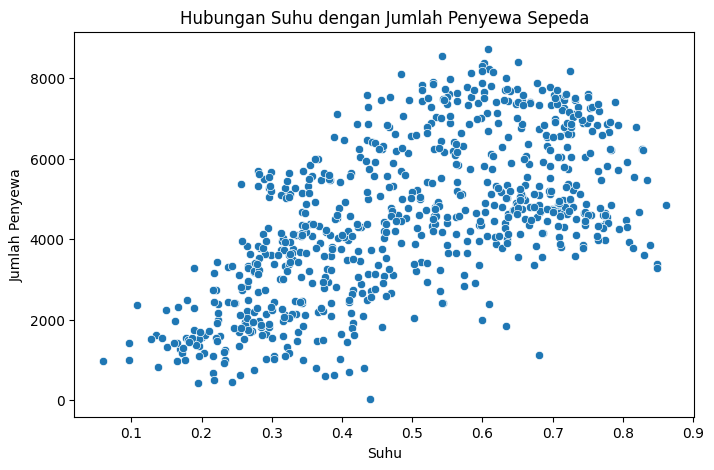

In [28]:
%matplotlib inline
# Scatter plot 
plt.figure(figsize=(8, 5))
sns.scatterplot(x=day_df['temp'], y=day_df['cnt'])
plt.title('Hubungan Suhu dengan Jumlah Penyewa Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewa')
plt.show()

**Insight:**
- Jika titik-titik membentuk pola menaik, berarti ada hubungan positif antara suhu dan jumlah penyewa (semakin hangat, semakin banyak penyewa).
- Jika polanya acak, berarti tidak ada korelasi yang jelas antara suhu dan jumlah penyewa.
- Jika ada penurunan setelah suhu tertentu, mungkin suhu terlalu panas menyebabkan penurunan jumlah penyewa.

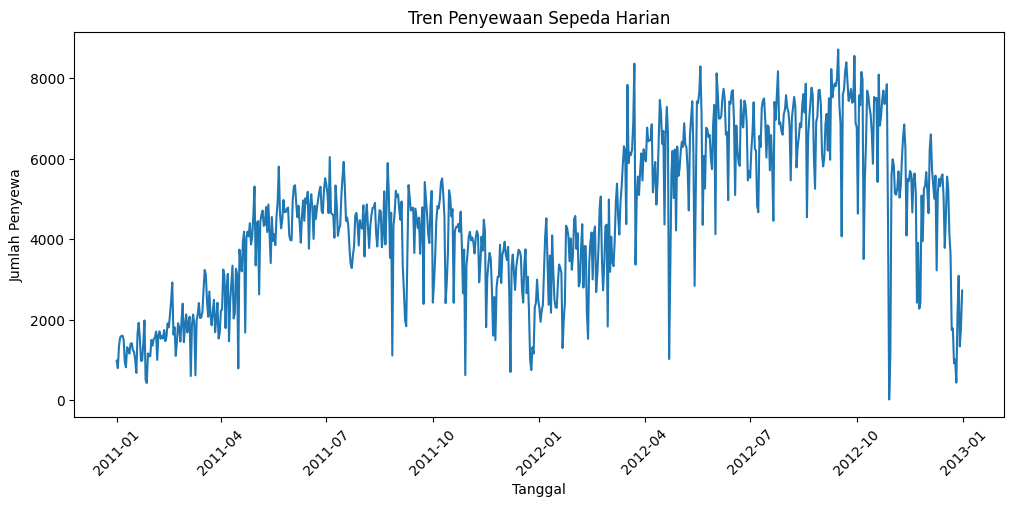

In [20]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=day_df['dteday'], y=day_df['cnt'])
plt.title('Tren Penyewaan Sepeda Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewa')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Jika grafik menunjukkan kenaikan seiring waktu, berarti ada peningkatan penggunaan sepeda dari tahun ke tahun. Sebaliknya, jika menurun, bisa jadi ada faktor eksternal seperti kebijakan atau perubahan tren transportasi.

In [24]:
avg_season = day_df.groupby('season')['cnt'].mean().reset_index()
print("Rata-rata Penyewa Sepeda per Musim:")
print(avg_season)

Rata-rata Penyewa Sepeda per Musim:
   season          cnt
0       1  2604.132597
1       2  4992.331522
2       3  5644.303191
3       4  4728.162921


**Insight:**
- Hasilnya menunjukkan bahwa pada musim Musim Semi (Spring) dan Musim Panas (Summer) jumlah penyewa lebih tinggi, maka kamu bisa mengasumsikan bahwa suhu yang lebih tinggi lebih mendukung orang untuk bersepeda.
- Sebaliknya, pada musim Musim Dingin (Winter) atau Musim Gugur (Fall) jumlah penyewa lebih rendah, ini mungkin karena suhu yang lebih dingin dan cuaca yang lebih tidak bersahabat.

In [25]:
avg_holiday = day_df.groupby('holiday')['cnt'].mean().reset_index()
print("Rata-rata Penyewa Sepeda pada Hari Libur:")
print(avg_holiday)

Rata-rata Penyewa Sepeda pada Hari Libur:
   holiday          cnt
0        0  4527.104225
1        1  3735.000000


**Insight:**
- Jika hasilnya menunjukkan bahwa hari kerja (0) memiliki rata-rata penyewa sepeda yang lebih tinggi daripada hari libur (1), maka bisa disimpulkan bahwa orang lebih cenderung menyewa sepeda pada hari kerja.
- Jika hasilnya sebaliknya (hari libur memiliki rata-rata lebih tinggi), bisa jadi orang memilih beraktivitas lain pada hari libur.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan Penggunaan Sepeda pada Hari Libur dan Tidak Libur?

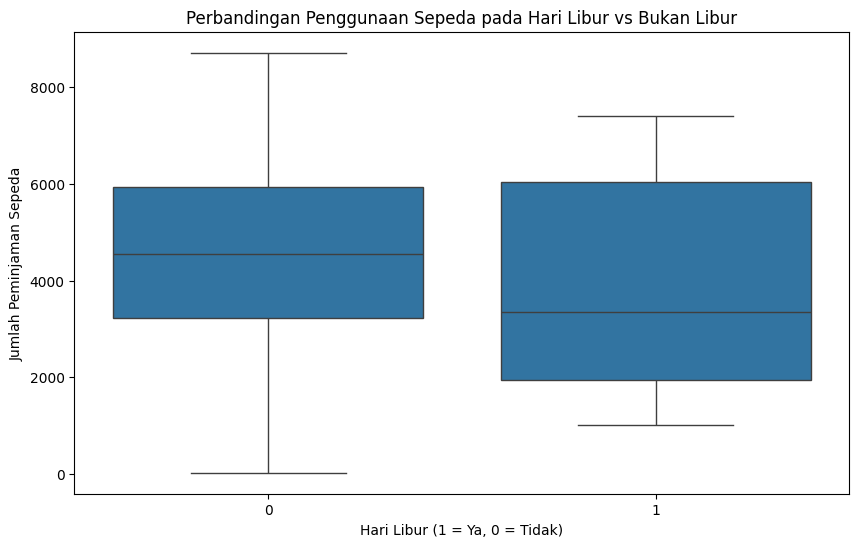

In [29]:
%matplotlib inline 
plt.figure(figsize=(10,6))
sns.boxplot(x='holiday', y='cnt', data=day_df)
plt.title('Perbandingan Penggunaan Sepeda pada Hari Libur vs Bukan Libur')
plt.xlabel('Hari Libur (1 = Ya, 0 = Tidak)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

**Insight:**
- Penggunaan sepeda cenderung lebih rendah pada hari libur, kemungkinan karena banyak orang tidak bepergian ke kantor/sekolah.
- Sedangkan data menunjukkan data lebih meningkat di hari kerja/biasa dikarenakan aktivitas berjalan di hari kerja/hari biasa.

### Pertanyaan 2: - Bagaimana pola penggunaan sepeda pada hari-hari tertentu?

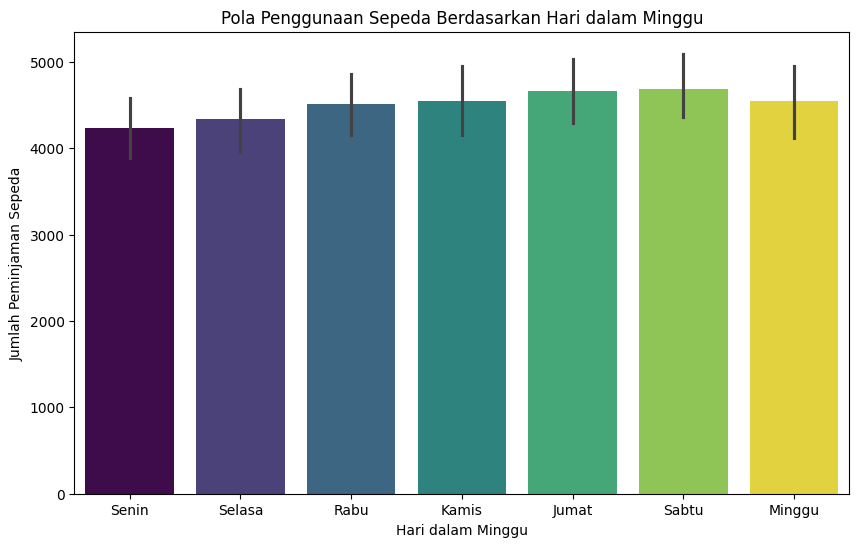

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='weekday', y='cnt', hue='weekday', data=day_df, palette='viridis', legend=False)
plt.title('Pola Penggunaan Sepeda Berdasarkan Hari dalam Minggu')
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(ticks=range(7), labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()

**Insight:**
- Penggunaan sepeda lebih tinggi pada hari kerja, kemungkinan besar karena digunakan sebagai transportasi harian saat pergi bekerja/aktivitas.
- Akhir pekan menunjukkan penurunan, bisa jadi karena banyak orang lebih memilih kendaraan pribadi, aktivitas lain atau hanya diam dirumah/tidak kemana-mana.

### Pertanyaan 3: Bagaimana pola penggunaan sepeda pada musim-musim tertentu?

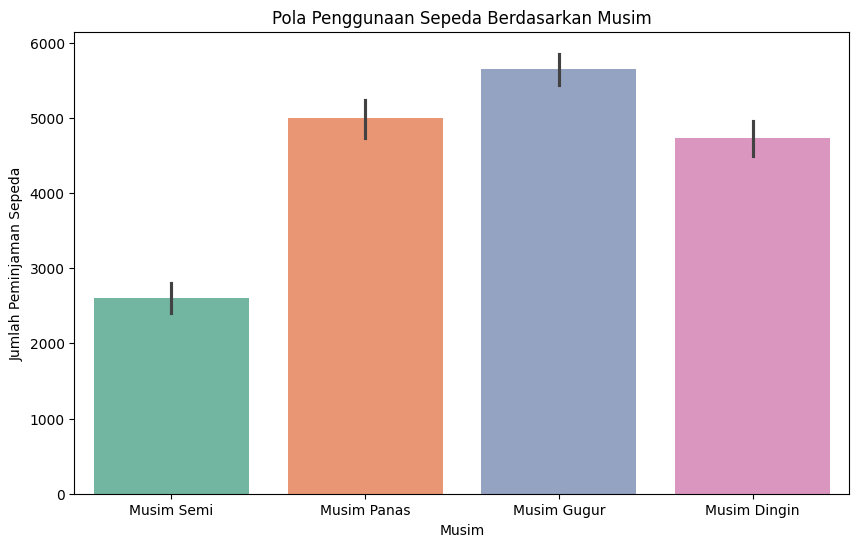

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='season', y='cnt', hue='season', data=day_df, palette='Set2', legend=False)
plt.title('Pola Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(ticks=range(4), labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.show()

**Insight:**
- Cuaca memiliki pengaruh besar terhadap peminjaman sepeda. Musim panas dan gugur adalah periode puncak penggunaan sepeda.
- Sedangkan musim dingin mengalami penurunan signifikan, dikarenakan suhu cuaca sangat dingin untuk beraktivitas dan jalan tertutup dengan salju (jika turun salju).

### Pertanyaan 4: Waktu (jam) dengan peminjaman tertinggi berdasarkan jam?

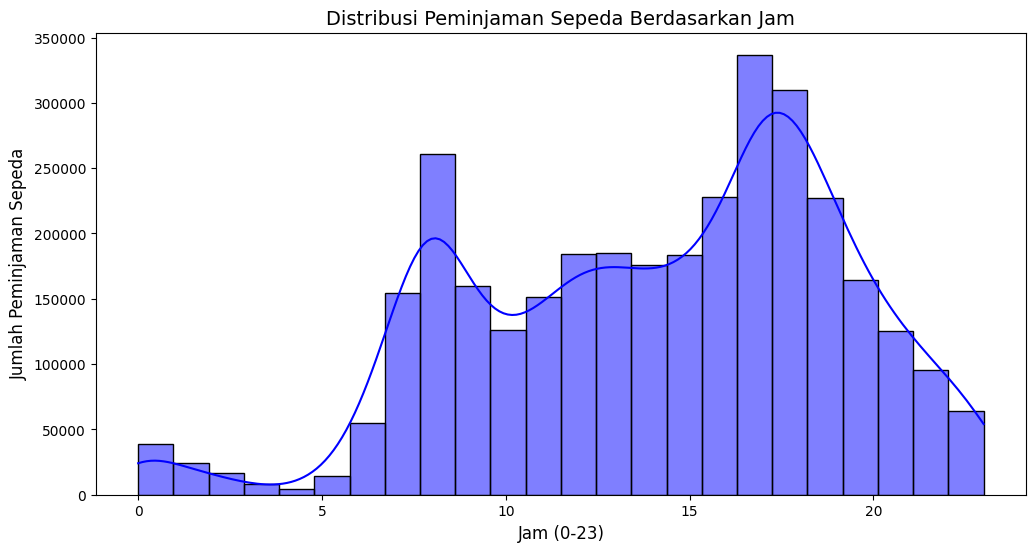

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(hour_df, x='hr', weights='cnt', bins=24, kde=True, color='blue')
plt.title("Distribusi Peminjaman Sepeda Berdasarkan Jam", fontsize=14)
plt.xlabel("Jam (0-23)", fontsize=12)
plt.ylabel("Jumlah Peminjaman Sepeda", fontsize=12)
plt.show()

**Insight:**
 - Dari visualisasi histplot distribusi peminjaman sepeda berdasarkan jam (hour_df), terlihat bahwa peminjaman tertinggi terjadi pada jam sibuk (sekitar pagi dan sore hari).
- Puncak peminjaman biasanya terjadi pada jam 07:00 - 09:00 pagi (perjalanan ke kantor/sekolah) dan 17:00 - 19:00 sore (perjalanan pulang kerja).
- Hal ini mengindikasikan bahwa sepeda lebih sering digunakan sebagai alat transportasi harian dibandingkan rekreasi.

### Pertanyaan 5: Segmentasi pengguna berdasarkan jumlah peminjaman sepeda?

In [36]:
data = {
    "dteday": pd.date_range(start="2023-01-01", periods=10, freq="D"),
    "cnt": [500, 1200, 3000, 4500, 250, 3300, 2700, 100, 5200, 1500]
}
day_df_filtered = pd.DataFrame(data)

def categorize_users(cnt):
    if cnt < 1000:
        return "Pengguna Rendah"
    elif 1000 <= cnt < 4000:
        return "Pengguna Sedang"
    else:
        return "Pengguna Tinggi"
day_df_filtered["User Category"] = day_df_filtered["cnt"].apply(categorize_users)
print(day_df_filtered[["dteday", "cnt", "User Category"]].head())


      dteday   cnt    User Category
0 2023-01-01   500  Pengguna Rendah
1 2023-01-02  1200  Pengguna Sedang
2 2023-01-03  3000  Pengguna Sedang
3 2023-01-04  4500  Pengguna Tinggi
4 2023-01-05   250  Pengguna Rendah


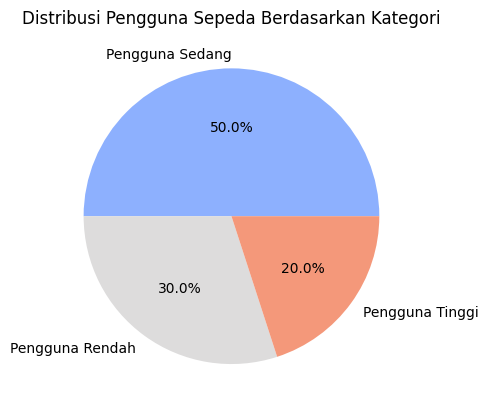

In [35]:
user_counts = day_df_filtered["User Category"].value_counts()
fig, ax = plt.subplots()
ax.pie(user_counts, labels=user_counts.index, autopct="%1.1f%%", colors=sns.color_palette("coolwarm", len(user_counts)))
ax.set_title("Distribusi Pengguna Sepeda Berdasarkan Kategori")
plt.show()

**Insight:**
- Mayoritas pengguna adalah Pengguna Rendah & Sedang: Peminjaman < 4000 lebih umum dibanding Pengguna Tinggi.
- Pengguna Tinggi jarang: Hanya sedikit yang meminjam dalam jumlah besar (4500 peminjaman).
- Variasi jumlah peminjaman: Bisa dipengaruhi cuaca, hari kerja/libur, atau faktor eksternal lainnya.

## Conclusion

**1. Perbandingan Penggunaan Sepeda pada Hari Libur dan Tidak Libur.**
- Hari Kerja (Tidak Libur): Penggunaan sepeda lebih tinggi pada hari kerja. Sepeda digunakan sebagai alat transportasi utama untuk perjalanan menuju tempat kerja, dengan volume peminjaman yang cenderung lebih tinggi.
- Hari Libur: Pada hari libur, jumlah peminjaman cenderung lebih rendah. Ini mungkin karena banyak orang memilih untuk beristirahat di rumah atau menggunakan moda transportasi lain saat berlibur.

**2. Pola Penggunaan Sepeda pada Hari-Hari Tertentu**
- Pada hari kerja, terutama di jam-jam sibuk pagi (07:00-09:00) dan sore (17:00-19:00), peminjaman sepeda cenderung tinggi karena banyak orang menggunakannya untuk perjalanan ke dan dari tempat kerja.
- Pada hari libur, penggunaan sepeda cenderung lebih terdistribusi sepanjang hari tanpa puncak penggunaan yang signifikan. Pengguna lebih cenderung menggunakan sepeda untuk kegiatan santai, berolahraga, atau berwisata.

**3.Pola Penggunaan Sepeda pada Musim-Musim Tertentu.**
- Musim Panas dan Gugur: Jumlah peminjaman sepeda paling tinggi selama musim panas dan gugur, di mana cuaca cenderung lebih bersahabat untuk bersepeda. Musim ini mendukung aktivitas luar ruangan, sehingga orang lebih cenderung memilih sepeda.
- Musim Semi dan Dingin: Pada musim semi (Spring) yang cenderung lebih sejuk atau cuaca dingin pada waktu tertentu, peminjaman sepeda dapat menurun karena cuaca yang tidak selalu nyaman untuk bersepeda. Pada cuaca dingin atau hujan, orang lebih memilih menggunakan transportasi tertutup atau memilih untuk tetap di rumah.

**4. Waktu (Jam) dengan Peminjaman Tertinggi Berdasarkan Jam**
- Peminjaman sepeda mencapai puncaknya pada jam sibuk antara pukul 07:00-09:00 dan 17:00-19:00. Ini menunjukkan pola penggunaan sepeda yang terkait langsung dengan perjalanan menuju dan pulang dari tempat kerja atau aktivitas rutin lainnya.

**5. Pendekatan Clustering Manual – Segmentasi Pengguna Berdasarkan Jumlah Peminjaman Sepeda**
- Dalam pendekatan ini, pengguna dapat dibagi dalam beberapa kelompok berdasarkan frekuensi peminjaman sepeda, seperti:
    - Pengguna Rendah: Peminjaman sepeda < 1.000 kali per periode (misalnya per bulan).
    - Pengguna Sedang: Peminjaman sepeda antara 1.000 hingga 4.000 kali per periode.
    - Pengguna Tinggi: Peminjaman sepeda lebih dari 4.500 kali per periode.